In [1]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

2023-08-11 03:45:10.628940: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 03:45:10.652738: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 03:45:10.653404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 03:45:11.238363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
loaded_model = keras.models.load_model('via_road_seg_v3.h5')

loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 120, 160, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 120, 160, 8)          224       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 120, 160, 8)          584       ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 60, 80, 8)            0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [3]:
height, width = 120, 160
# input is path

def resize_img_1(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (width, height))
    plt.imshow(img)
    return img
    
def predict_1(img_path):
    img = resize_img_1(img_path)
    pred = loaded_model.predict(np.expand_dims(img, 0))
    pred = np.where(pred>=0.5, 1.0, 0.0)
    pred = pred.reshape(120, 160,1)
    plt.imshow(pred)
    return pred    
    

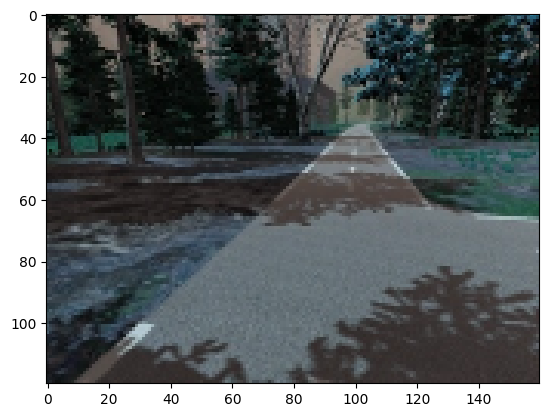

In [5]:
img = resize_img_1('/home/ankhanh/CuocDuaSo/data/capture01/pic24.0.jpg')

1/1 [==============================] - 0s 190ms/step


(120, 160, 1)

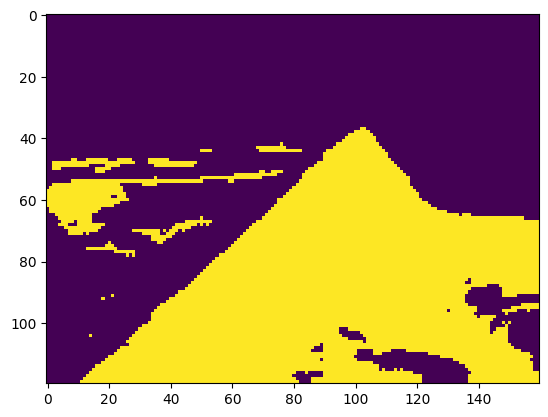

In [6]:
mask = predict_1('/home/ankhanh/CuocDuaSo/data/capture01/pic24.0.jpg')
mask.shape

1/1 [==============================] - 0s 155ms/step


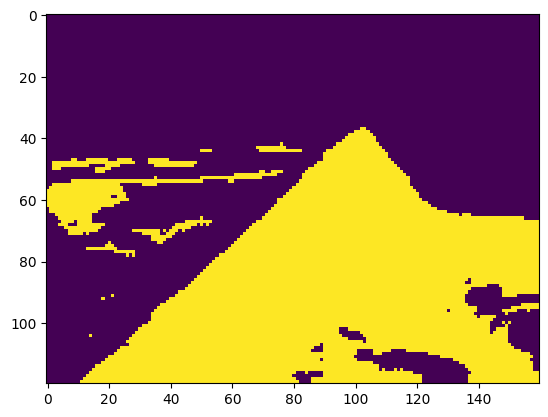

In [6]:
height, width = 120, 160
# input is image


def resize_img_2(img):
    #img = cv2.imread(img_path)
    img = cv2.resize(img, (width, height))
    #plt.imshow(img)
    return img

def predict_2(img):
    img = resize_img_2(img)
    pred = loaded_model.predict(np.expand_dims(img, 0))
    pred = np.where(pred>=0.5, 1.0, 0.0)
    pred = pred.reshape(120, 160,1)
    plt.imshow(pred)
    return pred 
pred_img = predict_2(img)

In [7]:
import cv2
import numpy as np

In [8]:
mask = np.array(pred_img)
type(mask)

numpy.ndarray

In [16]:
# blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)

# # Áp dụng phép dilation để kết hợp các vùng dự đoán
# dilated_mask = cv2.dilate(blurred_mask, np.ones((5, 5), np.uint8), iterations=1)

# # Áp dụng phép erosion để làm sạch các vùng dự đoán
# eroded_mask = cv2.erode(dilated_mask, np.ones((5, 5), np.uint8), iterations=1)

# # Hiển thị ảnh gốc, ảnh đã làm mờ, và ảnh đã làm sạch
# cv2.imshow('Original Mask', mask)
# cv2.imshow('Blurred Mask', blurred_mask)
# cv2.imshow('Cleaned Mask', eroded_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
mask = mask.astype(np.uint8)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area or other properties
min_area_threshold = 400  # Adjust the minimum area threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

# Create a new mask with filtered contours
cleaned_mask = np.zeros_like(mask)
cv2.drawContours(cleaned_mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

# Expand dimensions to match original shape
cleaned_mask = np.expand_dims(cleaned_mask, axis=-1)

# Display the original mask and cleaned mask
cv2.imshow('Original Mask', mask)
cv2.imshow('Cleaned Mask', cleaned_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread (0x2b07310).
Cannot move to target thread (0x726b810)

QObject::moveToThread: Current thread (0x726b810) is not the object's thread

error: OpenCV(4.5.2) /tmp/pip-req-build-qm9qliph/opencv/modules/core/src/array.cpp:2494: error: (-206:Bad flag (parameter or structure field)) Unrecognized or unsupported array type in function 'cvGetMat'


NameError: name 'mask_gray' is not defined